In [1]:
import numpy as ns
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

In [2]:
# Step 1: Read the file train.csv into Python and print a few rows.

# Step 2: Calculate the number of surviving/non-surviving passengers
#         and display it as a bar plot.

# Step 3: Calculate the proportion of surviving 1st class passengers
#         with regards to the total number of 1st class passengers.

# Step 4: Create a bar plot with separate bars for male/female passengers
#         and 1st/2nd/3rd class passengers.

# Step 5: Create a histogram showing the age distribution of passengers.
#         Compare surviving/non-surviving passengers.

# Step 6: Calculate the average age for survived and drowned passengers separately.

# Step 7: Replace missing age values by the mean age.

# Step 8: Create a table counting the number of surviving/dead passengers
#         separately for 1st/2nd/3rd class and male/female.

In [3]:
# Step 1: Read the file train.csv into Python and print a few rows.

df = pd.read_csv('input_data/train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Figure size 432x288 with 0 Axes>

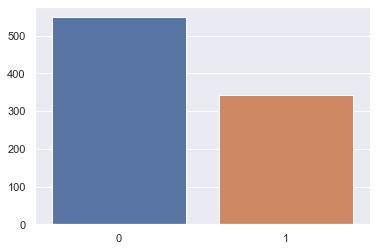

<Figure size 432x288 with 0 Axes>

In [4]:
# Step 2: Calculate the number of surviving/non-surviving passengers
#         and display it as a bar plot.

sns.barplot(
    x='Survived',
    y='Count',
    data={
        'Survived': [1, 0], 
        'Count': [
            df['Survived'].sum(),
            df.shape[0] - df['Survived'].sum()
        ]
    }
)
plt.figure()


<AxesSubplot:>

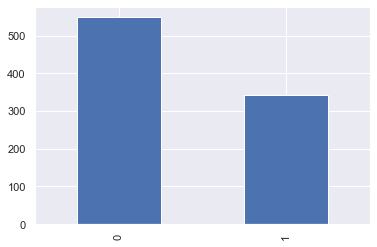

In [5]:
# (Step 2)
df['Survived'].value_counts().plot.bar()

In [6]:
# Step 3: Calculate the proportion of surviving 1st class passengers
#         with regards to the total number of 1st class passengers.


surviving_proportion = {
    p_class:
        df[df['Pclass'] == p_class]['Survived'].sum() / 
        df[df['Pclass'] == p_class].shape[0] * 100
    for p_class in df['Pclass'].unique()
}
surviving_proportion


{3: 24.236252545824847, 1: 62.96296296296296, 2: 47.28260869565217}

In [7]:
# Step 3
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass'>

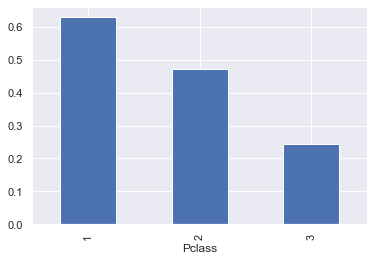

In [8]:
# (Step 3)
df.groupby('Pclass')['Survived'].mean().plot.bar()

In [9]:
# (Srep 3)
df.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [10]:
# (Step 3)
df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


<AxesSubplot:xlabel='Pclass'>

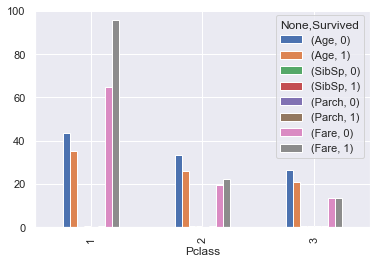

In [11]:
# (Step 3)
df.groupby(['Pclass', 'Survived']).mean().unstack().plot.bar()

<AxesSubplot:xlabel='Pclass'>

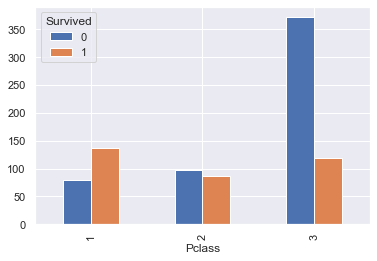

In [12]:
# (Step 3)
df.groupby(['Pclass', 'Survived'])['Sex'].count().unstack().plot.bar()

<AxesSubplot:xlabel='Survived'>

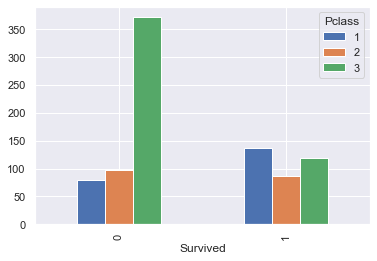

In [13]:
# (Step 3)
df.groupby(['Survived', 'Pclass'])['Sex'].count().unstack().plot.bar()

<AxesSubplot:xlabel='Pclass'>

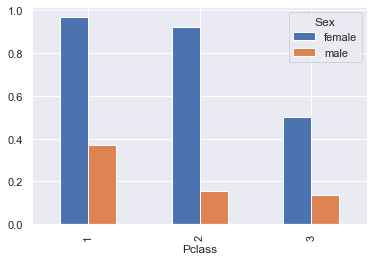

In [14]:
# Step 4: Create a bar plot with separate bars for male/female passengers
#         and 1st/2nd/3rd class passengers.

df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack().plot.bar()


<AxesSubplot:>

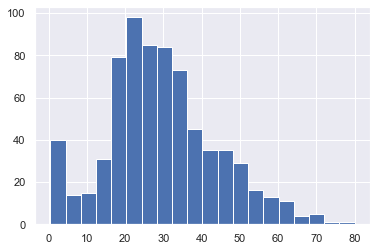

In [15]:
# (Srep 5)
df['Age'].hist(bins=20)

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

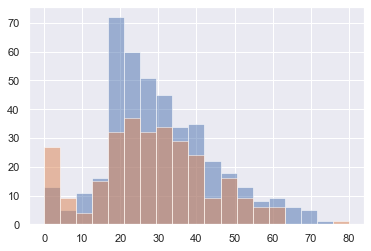

In [16]:
# Step 5: Create a histogram showing the age distribution of passengers.
#         Compare surviving/non-surviving passengers.

df.groupby(['Survived'])['Age'].hist(alpha=0.5, bins=ns.linspace(0, 80, 20))


In [17]:
# Step 6: Calculate the average age for survived and drowned passengers separately.

df.groupby(['Survived'])['Age'].mean()


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [32]:
# Step 7: Replace missing age values by the mean age.

mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)
df.groupby(['Survived'])['Age'].mean()


Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64

In [19]:
# (Step 8)
df.groupby(['Pclass', 'Sex', 'Survived'])['Name'].count()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Name, dtype: int64

In [20]:
# (Step 8)
df.groupby(['Pclass', 'Sex', 'Survived'])['Name'].count().unstack()

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

<AxesSubplot:xlabel='Pclass,Sex'>

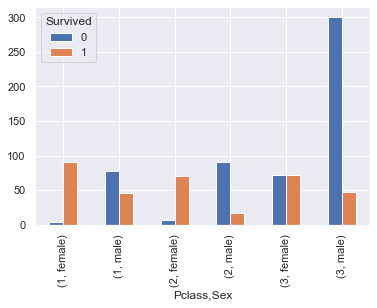

In [21]:
# Step 8
df.groupby(['Pclass', 'Sex', 'Survived'])['Name'].count().unstack().plot.bar()